# Import Librairies 

In [1]:
# manipulate data 
import pandas as pd
import numpy as np
#data vizualisation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import io

# Upload data

In [7]:
data_fr_txt = open("./data/small_vocab_fr.txt", encoding="utf-8").read()
data_en_txt = open("./data/small_vocab_en.txt", encoding="utf-8").read()
data_fr = pd.read_csv('./data/small_vocab_fr.txt', sep = "\t", header = None)
data_en = pd.read_csv('./data/small_vocab_en.txt', sep = "\t", header = None)

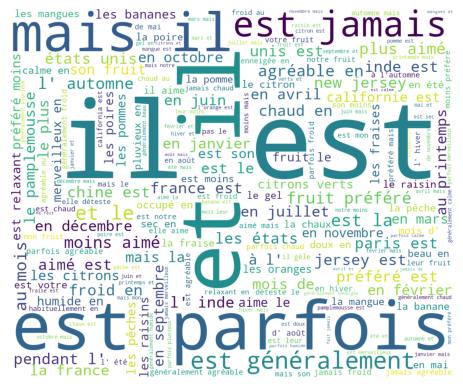

In [3]:
wordcloud = WordCloud(
                      background_color = 'white',
                      width = 1200,
                      height = 1000,
                      ).generate(data_fr_txt)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

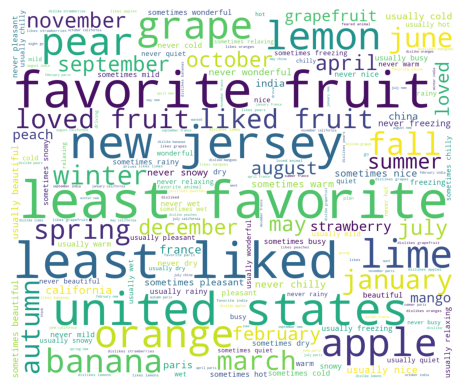

In [4]:
wordcloud = WordCloud(
                      background_color = 'white',
                      width = 1200,
                      height = 1000,
                      ).generate(data_en_txt)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
all_words_without_withspace_en = []
for i in data_en[0]:
    for y in i.split():
        if y == ',' or y == "." : continue
        all_words_without_withspace_en.append(y)
        

# Calling DataFrame constructor on list
df_word_without_whitespace_en = pd.DataFrame(all_words_without_withspace_en)

is        205858
in         75525
it         75137
during     74933
the        67628
           ...  
does          24
am            24
isn't         24
where         12
have          12
Length: 225, dtype: int64

<AxesSubplot:>

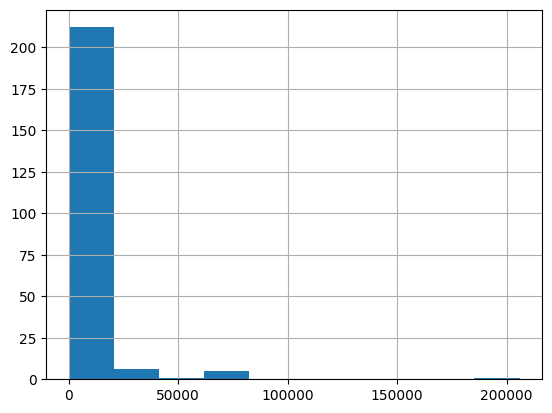

In [30]:
# essaie de plot un histogramme des 10 mots les plus utiliser dans le coprus
df_word_without_whitespace_en.value_counts().hist()